#**`1.Mounting Google Drive`**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#**`2.Set Data Path`**

In [ ]:
data_path = '/content/drive/MyDrive/Machine Learning/'


#**`3.Read Data`**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv(data_path + 'TestMatches.csv')

# Display the first few rows of the dataset to verify
data.head()


,TEST Match No,Match ID,Match Name,Series ID,Series Name,Match Start Date,Match End Date,Match Format,Team1 ID,Team1 Name,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,2378,1183534,Australia Vs New Zealand 3Rd Test,1195334,ICC World Test Championship - 2019 (2019-2021),2020-01-03,2020-01-06,TEST,2,Australia,...,M Erasmus,RB Richardson,Australia,bat,Australia,Australia won by 279 runs,78285.0,"['48739', '54337', '78285', '50281', '49024', ...","['59148', '61839', '51094', '44930', '80639', ...",['80639']
1,2383,1212542,Zimbabwe Vs Sri Lanka 2Nd Test,1212540,Sri Lanka in Zimbabwe - 2020 (2019/20),2020-01-27,2020-01-31,TEST,9,Zimbabwe,...,Nitin Menon,J Srinath,Zimbabwe,bat,NaN,Match drawn,52319.0,"['49274', '49118', '62298', '47205', '45253', ...","['48988', '57982', '70888', '47023', '52371', ...",['55145']
2,2384,1213062,Pakistan Vs Bangladesh 1St Test,1195334,Bangladesh in Pakistan - 2020 (2019/20),2020-02-07,2020-02-10,TEST,25,Bangladesh,...,NJ Llong,RB Richardson,Pakistan,bowl,Pakistan,Pakistan won by an innings and 44 runs,103399.0,"['48391', '80555', '70872', '58225', '47352', ...","['49236', '48306', '11475', '56880', '53493', ...",['80555']
3,650,63035,Pakistan Vs England 3Rd Test,60425,England tour of Pakistan - 1969 (1968/69),1969-03-06,1969-03-10,TEST,1,England,...,Shujauddin,NaN,England,bat,NaN,Match drawn,NaN,"['1282', '1203', '895', '998', '1316', '1283',...","['1323', '931', '1105', '1237', '1065', '1239'...",['1329']
4,651,63037,New Zealand Vs West Indies 2Nd Test,60426,West Indies tour of New Zealand - 1969 (1968/69),1969-03-07,1969-03-11,TEST,4,West Indies,...,ECA MacKintosh,NaN,New Zealand,bowl,New Zealand,New Zealand won by 6 wickets,NaN,"['1322', '1202', '1129', '1084', '1286', '985'...","['1176', '1328', '1251', '1326', '1259', '1253...",[]


#**`4.Feature Engineering and Preprocessing`**

`Handling missing values `

In [ ]:
# Fill missing values using forward fill method
data.fillna(method='ffill', inplace=True)

# Check if there are any remaining missing values
data.isnull().sum()


<ipython-input-6-76456045eeb3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,0
TEST Match No,0
Match ID,0
Match Name,0
Series ID,0
Series Name,0
Match Start Date,0
Match End Date,0
Match Format,0
Team1 ID,0
Team1 Name,0


`Normalizing the data `

In [ ]:
# List the columns that need normalization (you can modify this based on your data)
numerical_columns = ['Innings1 Team1 Runs Scored', 'Innings1 Team1 Wickets Fell',
                     'Innings2 Team1 Runs Scored', 'Innings2 Team1 Wickets Fell',
                     'Innings1 Team2 Runs Scored', 'Innings1 Team2 Wickets Fell',
                     'Innings2 Team2 Runs Scored', 'Innings2 Team2 Wickets Fell']

# Normalize the numerical columns
data[numerical_columns] = data[numerical_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Display the first few rows to check
data.head()


,TEST Match No,Match ID,Match Name,Series ID,Series Name,Match Start Date,Match End Date,Match Format,Team1 ID,Team1 Name,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,2378,1183534,Australia Vs New Zealand 3Rd Test,1195334,ICC World Test Championship - 2019 (2019-2021),2020-01-03,2020-01-06,TEST,2,Australia,...,M Erasmus,RB Richardson,Australia,bat,Australia,Australia won by 279 runs,78285.0,"['48739', '54337', '78285', '50281', '49024', ...","['59148', '61839', '51094', '44930', '80639', ...",['80639']
1,2383,1212542,Zimbabwe Vs Sri Lanka 2Nd Test,1212540,Sri Lanka in Zimbabwe - 2020 (2019/20),2020-01-27,2020-01-31,TEST,9,Zimbabwe,...,Nitin Menon,J Srinath,Zimbabwe,bat,Australia,Match drawn,52319.0,"['49274', '49118', '62298', '47205', '45253', ...","['48988', '57982', '70888', '47023', '52371', ...",['55145']
2,2384,1213062,Pakistan Vs Bangladesh 1St Test,1195334,Bangladesh in Pakistan - 2020 (2019/20),2020-02-07,2020-02-10,TEST,25,Bangladesh,...,NJ Llong,RB Richardson,Pakistan,bowl,Pakistan,Pakistan won by an innings and 44 runs,103399.0,"['48391', '80555', '70872', '58225', '47352', ...","['49236', '48306', '11475', '56880', '53493', ...",['80555']
3,650,63035,Pakistan Vs England 3Rd Test,60425,England tour of Pakistan - 1969 (1968/69),1969-03-06,1969-03-10,TEST,1,England,...,Shujauddin,RB Richardson,England,bat,Pakistan,Match drawn,103399.0,"['1282', '1203', '895', '998', '1316', '1283',...","['1323', '931', '1105', '1237', '1065', '1239'...",['1329']
4,651,63037,New Zealand Vs West Indies 2Nd Test,60426,West Indies tour of New Zealand - 1969 (1968/69),1969-03-07,1969-03-11,TEST,4,West Indies,...,ECA MacKintosh,RB Richardson,New Zealand,bowl,New Zealand,New Zealand won by 6 wickets,103399.0,"['1322', '1202', '1129', '1084', '1286', '985'...","['1176', '1328', '1251', '1326', '1259', '1253...",[]


`Checking for multicollinearity`

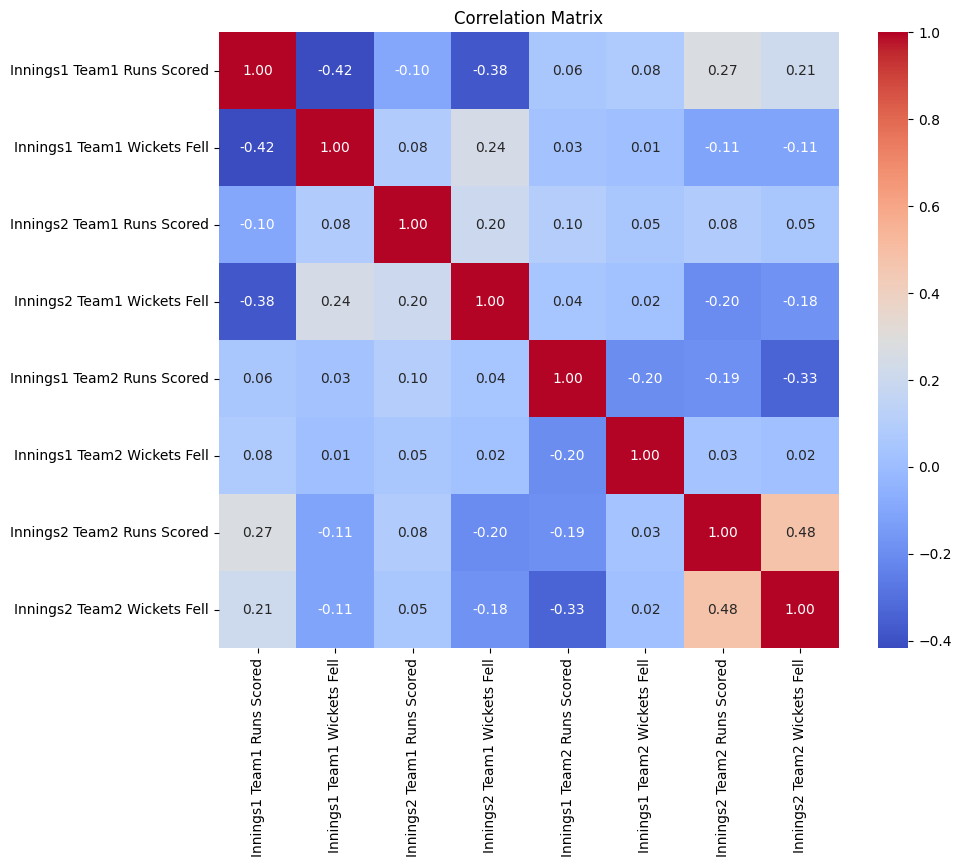

Variance Inflation Factor (VIF):
                       Feature         VIF
0                        const  146.323163
1   Innings1 Team1 Runs Scored    1.477173
2  Innings1 Team1 Wickets Fell    1.231295
3   Innings2 Team1 Runs Scored    1.095405
4  Innings2 Team1 Wickets Fell    1.246975
5   Innings1 Team2 Runs Scored    1.249688
6  Innings1 Team2 Wickets Fell    1.071468
7   Innings2 Team2 Runs Scored    1.376747
8  Innings2 Team2 Wickets Fell    1.453642


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Define the columns you want to check for multicollinearity
cluster_columns = ['Innings1 Team1 Runs Scored', 'Innings1 Team1 Wickets Fell', 'Innings2 Team1 Runs Scored',
                   'Innings2 Team1 Wickets Fell', 'Innings1 Team2 Runs Scored', 'Innings1 Team2 Wickets Fell',
                   'Innings2 Team2 Runs Scored', 'Innings2 Team2 Wickets Fell']  # Replace with your actual columns

# 1. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[cluster_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 2. Variance Inflation Factor (VIF)
X_with_const = add_constant(data[cluster_columns])  # Add constant column for VIF calculation

# Calculate VIF
vif = pd.DataFrame()
vif['Feature'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display VIF values
print("Variance Inflation Factor (VIF):")
print(vif)


`Feature Imbalance Handling`

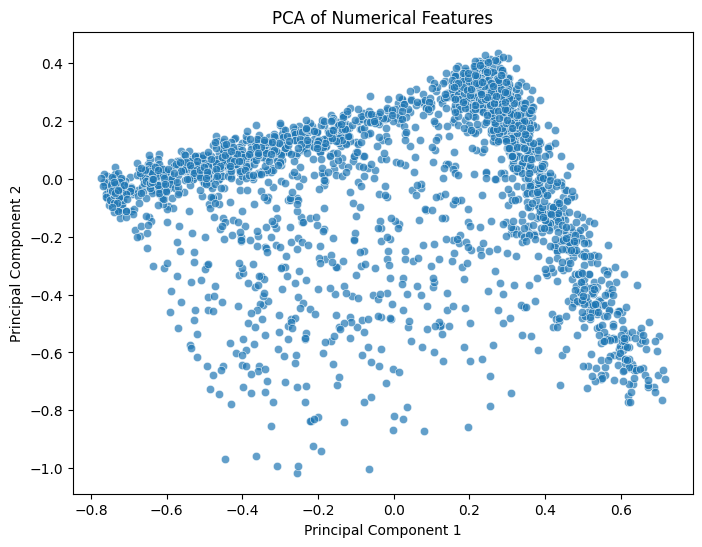

Explained Variance Ratio by each component:
[0.43773884 0.23971354]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for PCA (already normalized)
numerical_columns = ['Innings1 Team1 Runs Scored', 'Innings1 Team1 Wickets Fell',
                     'Innings2 Team1 Runs Scored', 'Innings2 Team1 Wickets Fell',
                     'Innings1 Team2 Runs Scored', 'Innings1 Team2 Wickets Fell',
                     'Innings2 Team2 Runs Scored', 'Innings2 Team2 Wickets Fell']

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for easy visualization
pca_components = pca.fit_transform(data[numerical_columns])

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Visualize the PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title('PCA of Numerical Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio (to understand how much variance is captured by each principal component)
print("Explained Variance Ratio by each component:")
print(pca.explained_variance_ratio_)


#**`5.Exploratory Data Analysis (EDA)`**

`Descriptive Statistics`

In [ ]:
# Summary statistics for numerical features
print(data.describe())


       TEST Match No      Match ID     Series ID     Team1 ID  Team1 Captain  \
count     2537.00000  2.537000e+03  2.537000e+03  2537.000000    2537.000000   
mean      1269.00000  2.858048e+05  2.821839e+05     4.647221   10472.013402   
std        732.51314  3.966273e+05  3.937401e+05     4.860323   18287.583902   
min          1.00000  6.238700e+04  6.026000e+04     1.000000       3.000000   
25%        635.00000  6.302100e+04  6.042200e+04     2.000000    1080.000000   
50%       1269.00000  6.365500e+04  6.060900e+04     4.000000    1765.000000   
75%       1903.00000  3.516810e+05  3.516100e+05     6.000000    7063.000000   
max       2537.00000  1.419831e+06  1.416069e+06    40.000000   79159.000000   

       Innings1 Team1 Runs Scored  Innings1 Team1 Wickets Fell  \
count                 2537.000000                  2537.000000   
mean                     0.357326                     0.948877   
std                      0.152354                     0.136858   
min            

`Visualizations`

`a) Histograms: Show the distribution of each numerical feature.`

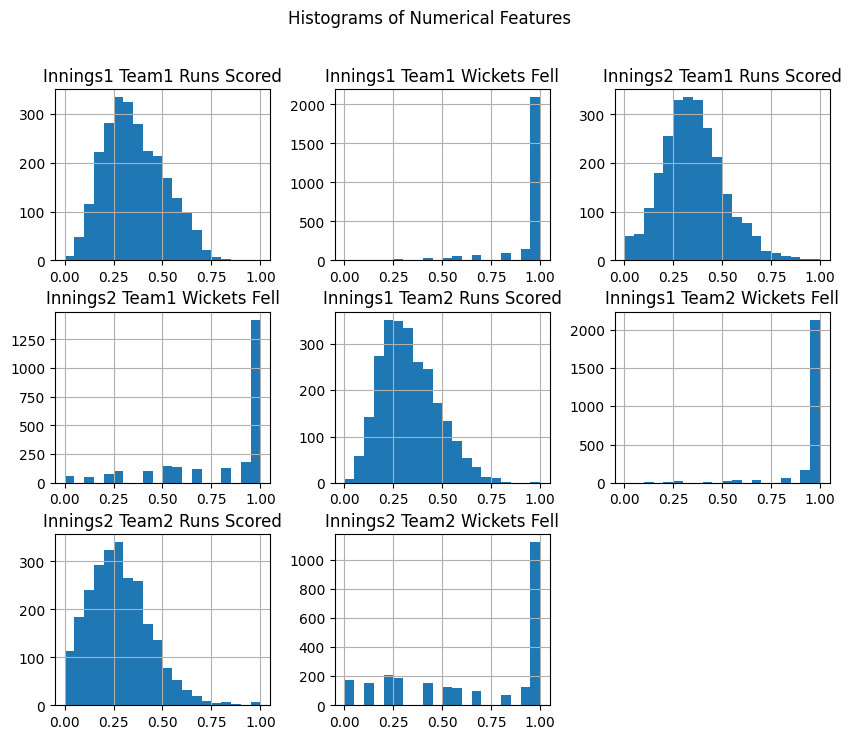

In [ ]:
# Plot histograms of numerical features
numerical_columns = ['Innings1 Team1 Runs Scored', 'Innings1 Team1 Wickets Fell',
                     'Innings2 Team1 Runs Scored', 'Innings2 Team1 Wickets Fell',
                     'Innings1 Team2 Runs Scored', 'Innings1 Team2 Wickets Fell',
                     'Innings2 Team2 Runs Scored', 'Innings2 Team2 Wickets Fell']

data[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()


`b) Boxplots: Check for outliers in the features.`

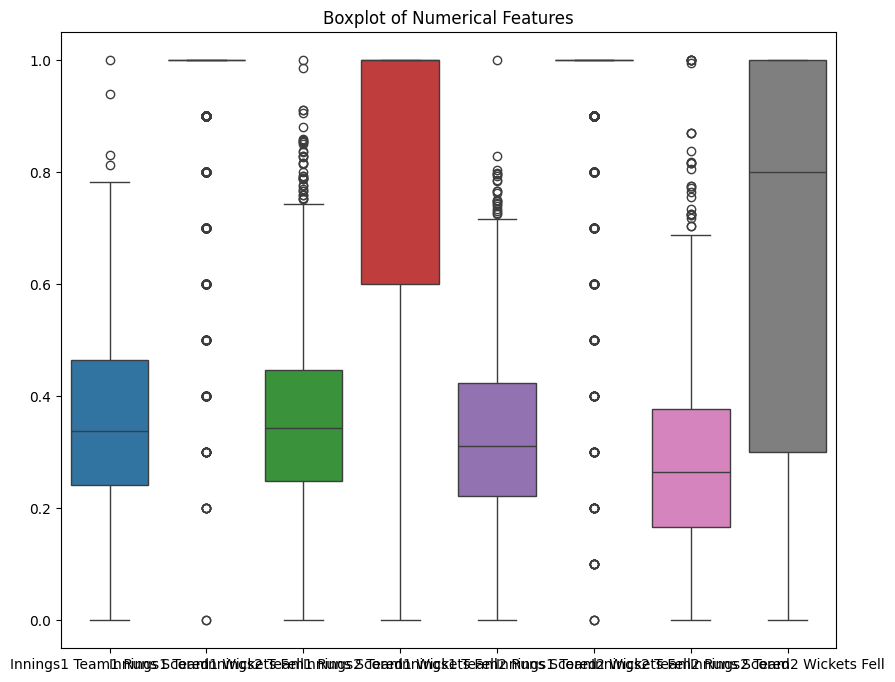

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.show()


`c) Correlation Heatmap: To visualize relationships between features and detect correlations.`



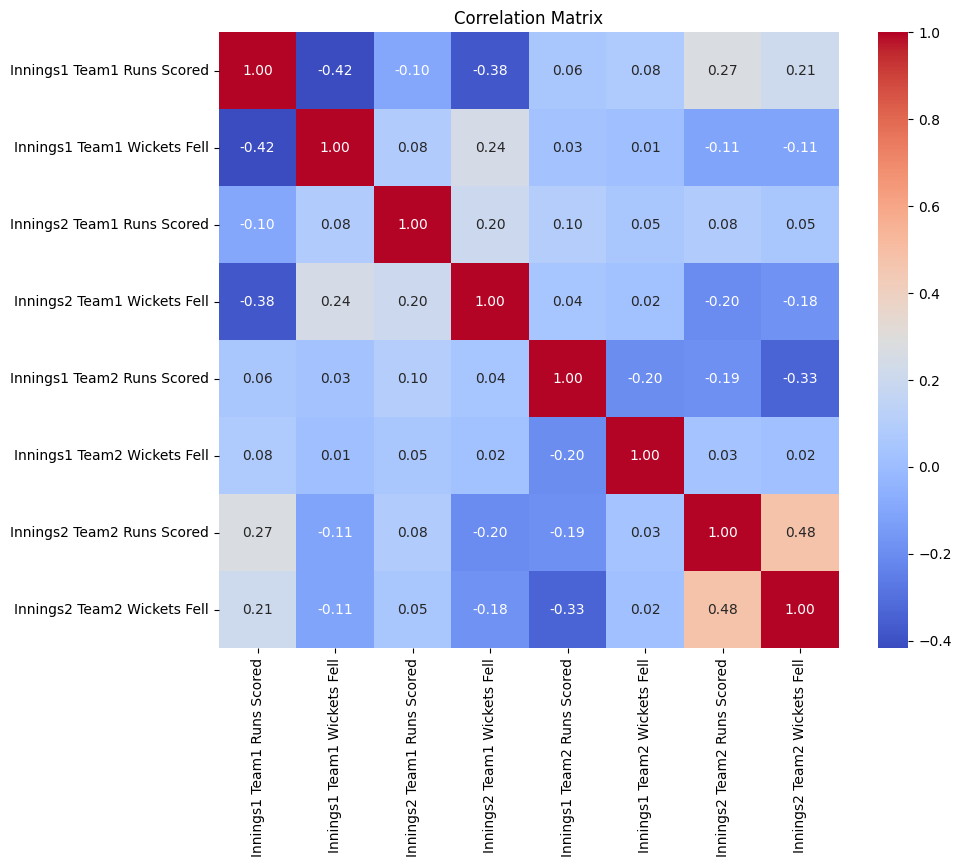

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


`d) Pairplot: Visualizing pairwise relationships to check if there are natural clusters.`

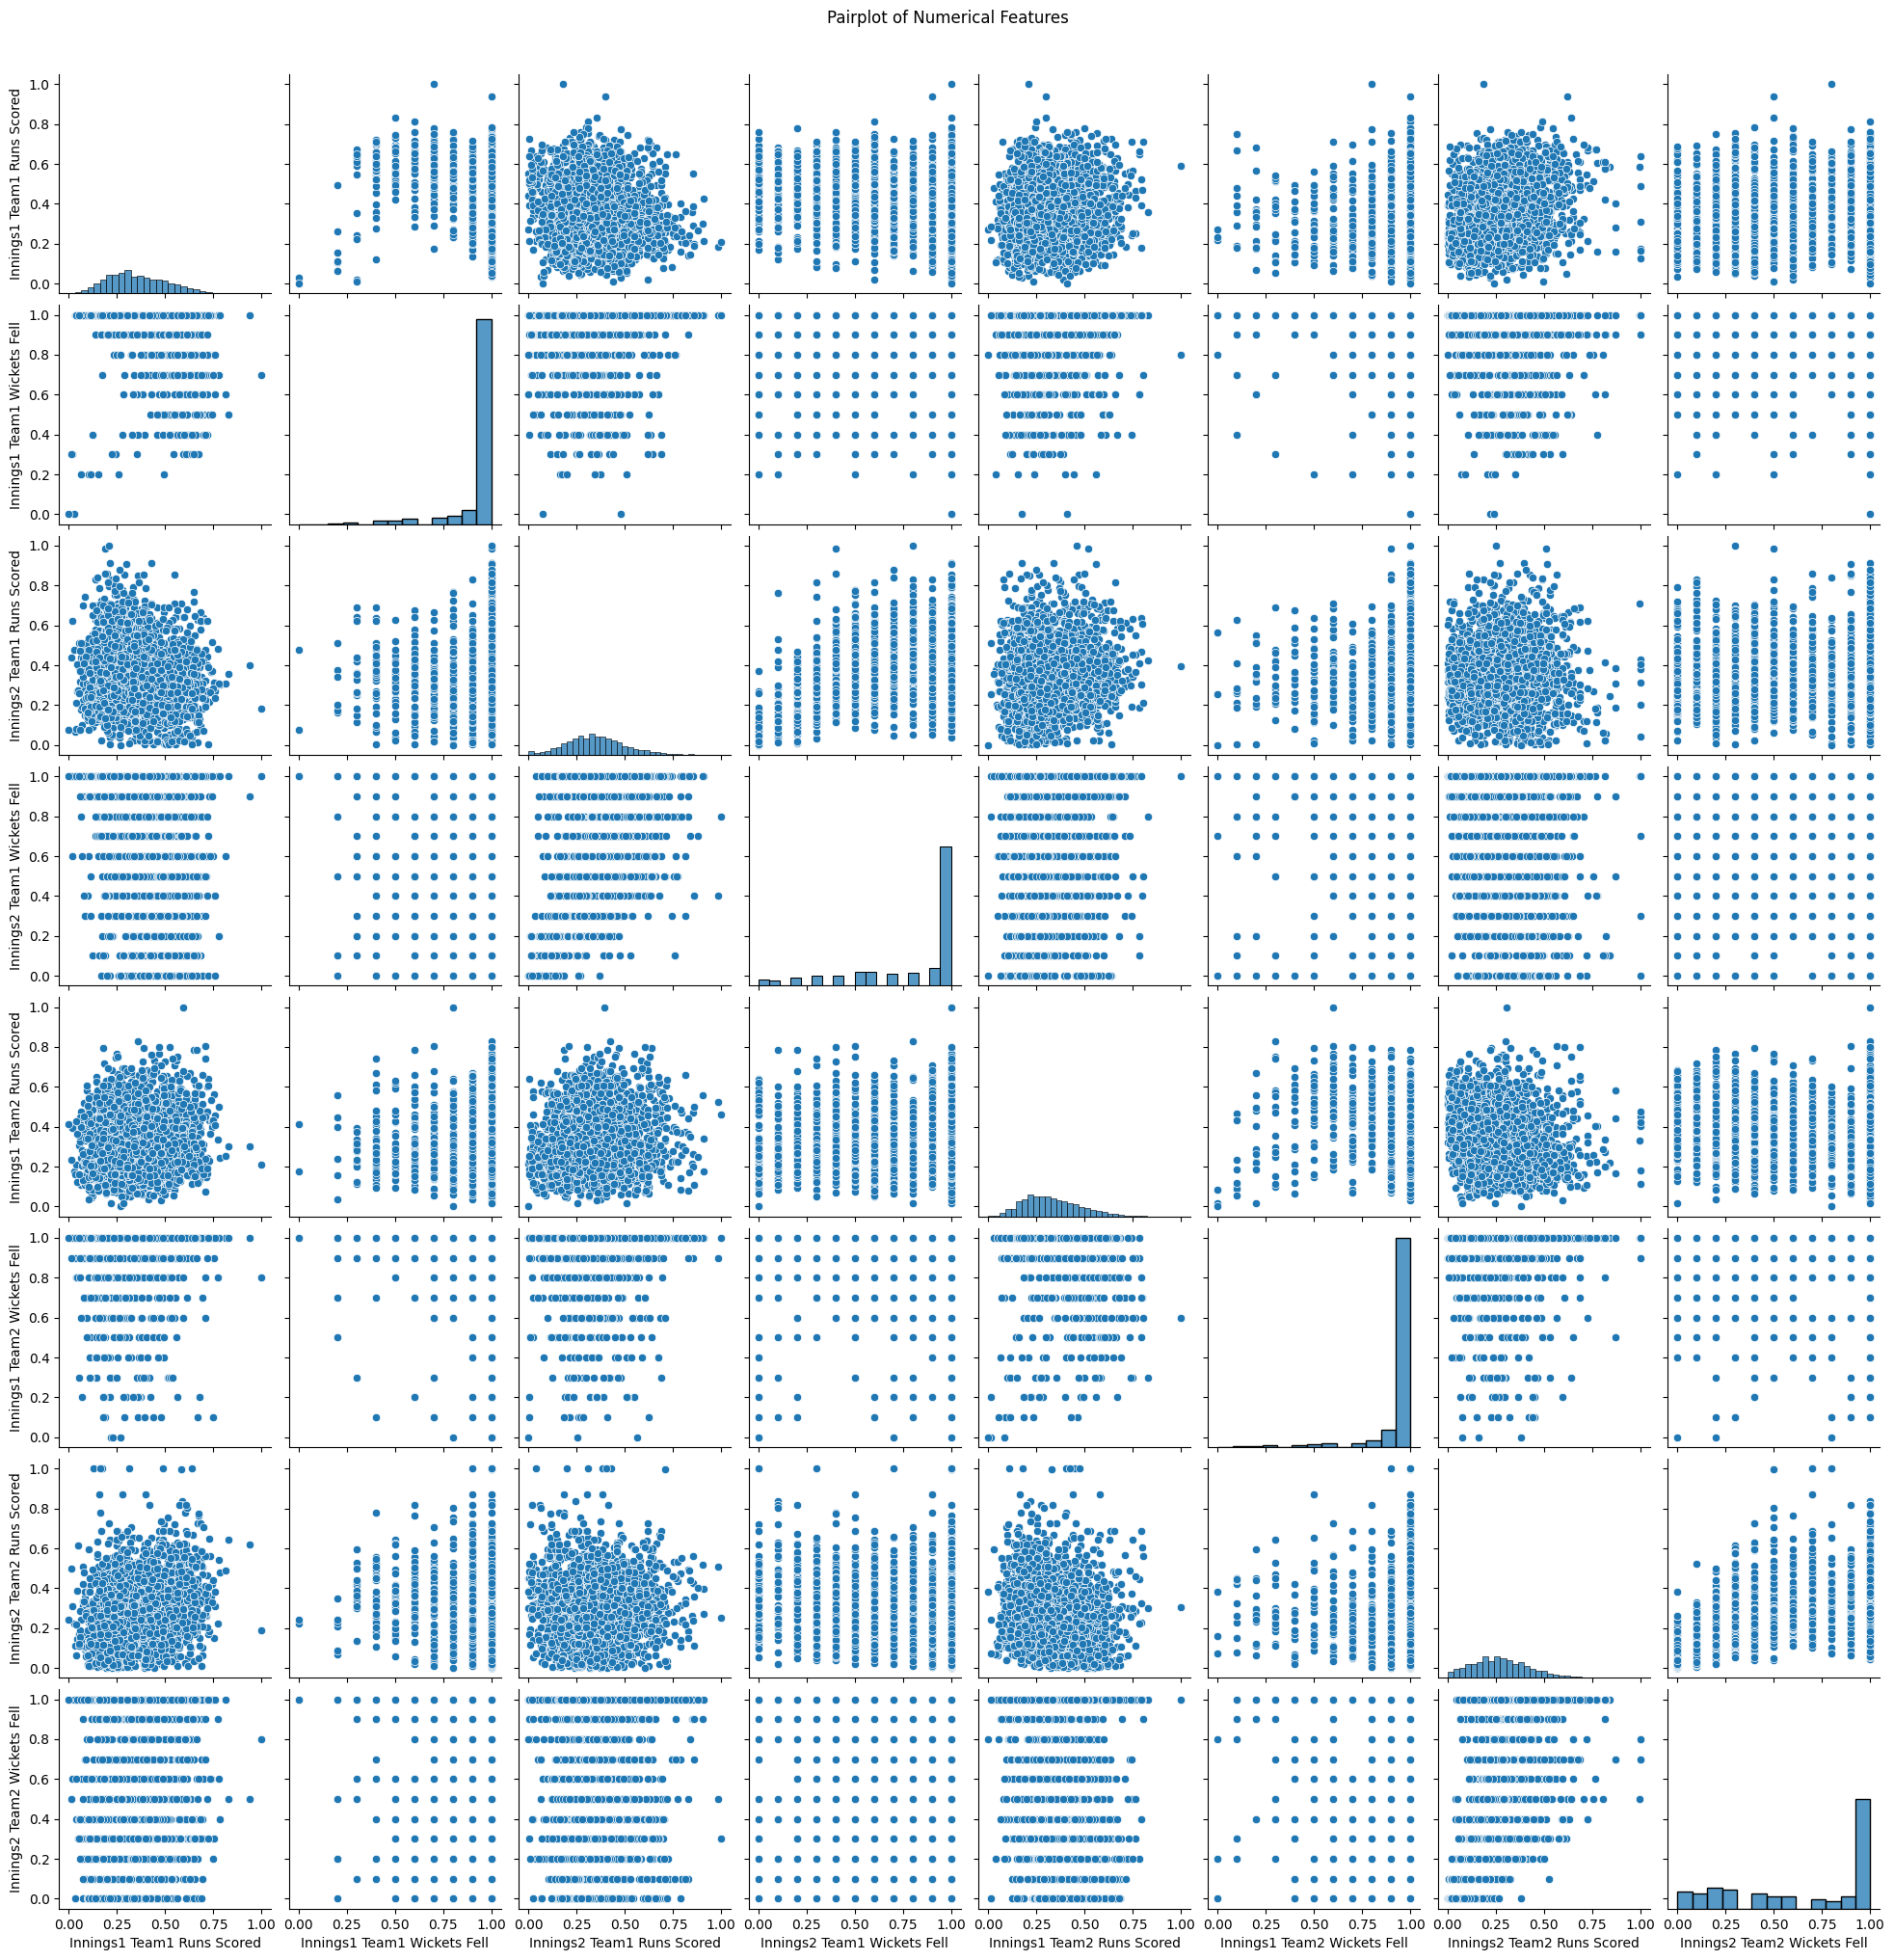

In [ ]:
# Pairplot of numerical features
sns.pairplot(data[numerical_columns])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


`Outlier Detection`

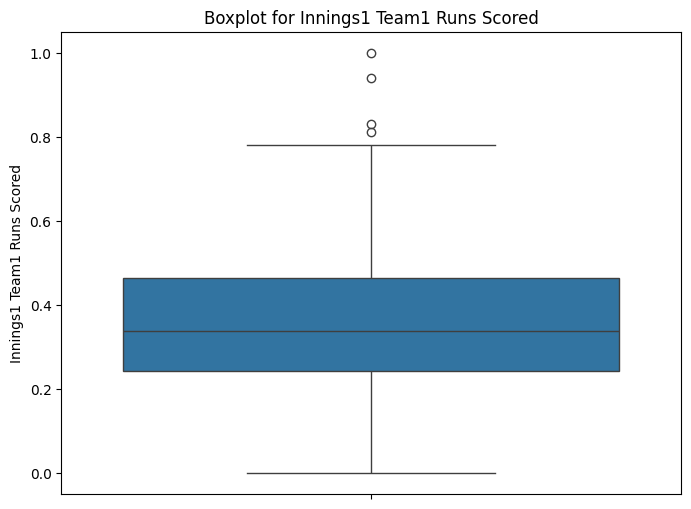

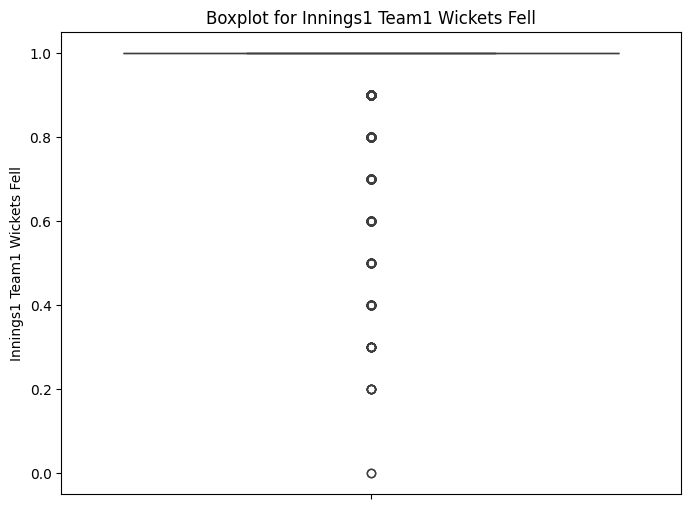

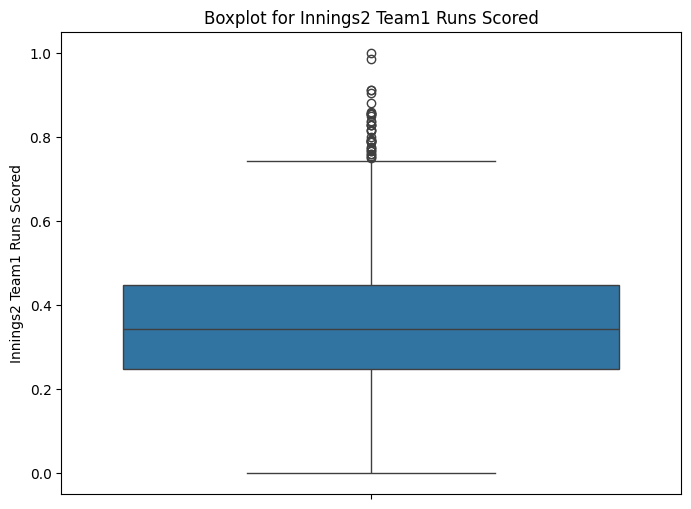

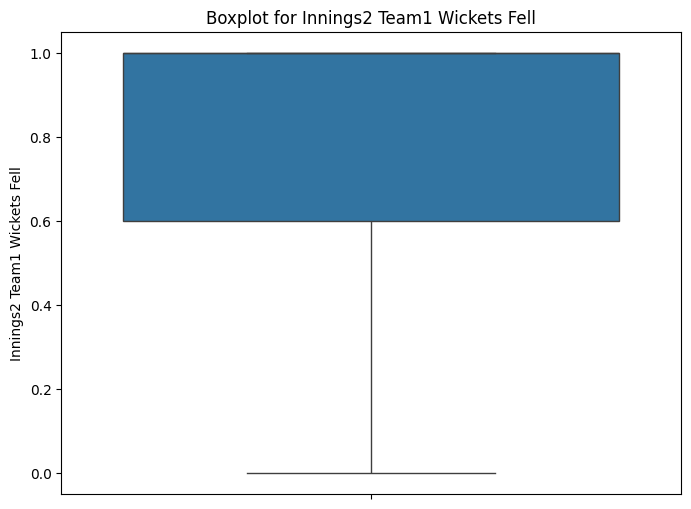

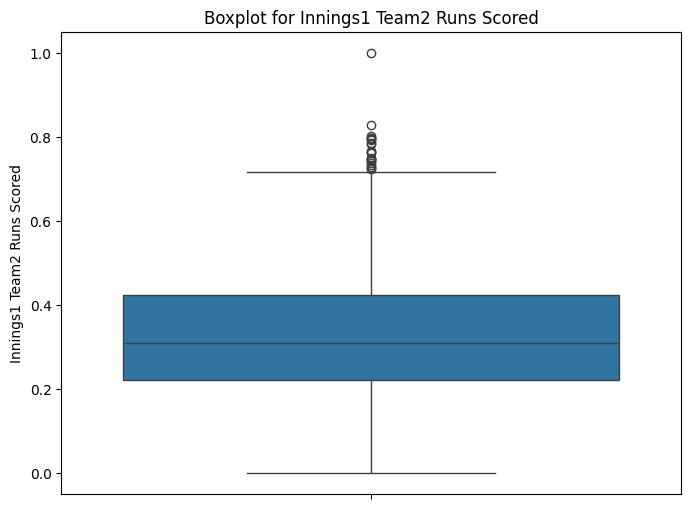

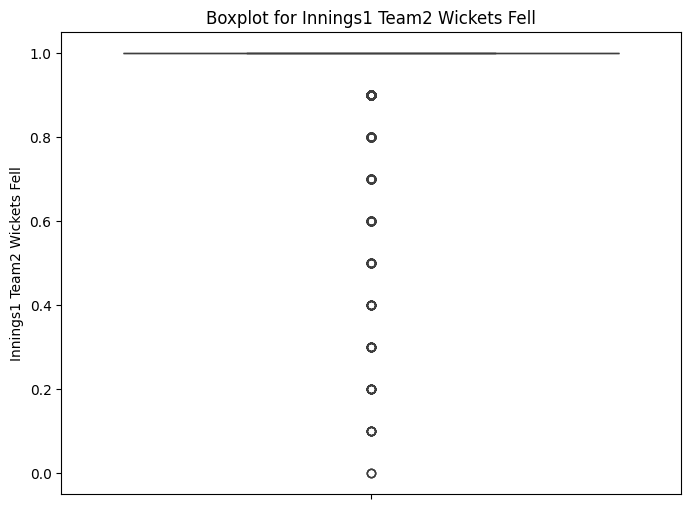

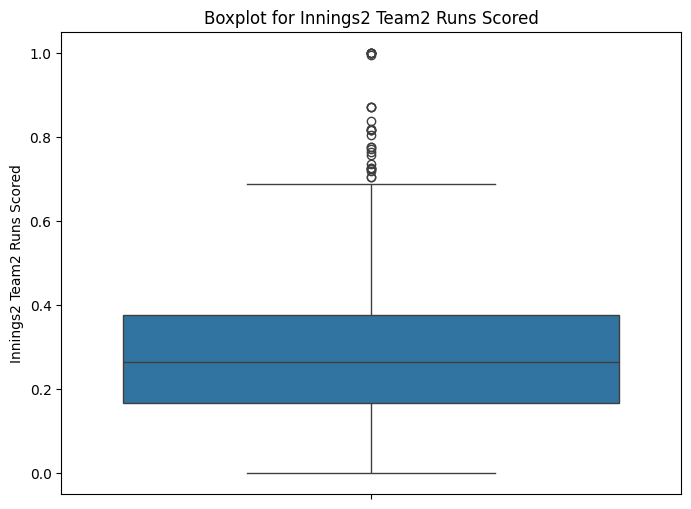

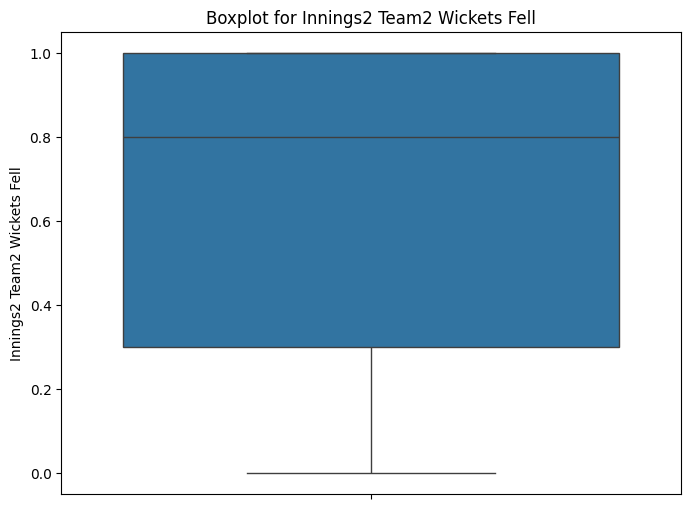

In [ ]:
# Visualize outliers using boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


`Feature Scaling `

In [ ]:
# Check the variance of the features to see if any feature has a much larger scale
print(data[numerical_columns].var())


Innings1 Team1 Runs Scored     0.023212
Innings1 Team1 Wickets Fell    0.018730
Innings2 Team1 Runs Scored     0.024501
Innings2 Team1 Wickets Fell    0.085207
Innings1 Team2 Runs Scored     0.020761
Innings1 Team2 Wickets Fell    0.019880
Innings2 Team2 Runs Scored     0.024494
Innings2 Team2 Wickets Fell    0.135862
dtype: float64


`Dimensionality Reduction: PCA for visualizing in lower dimensions.`

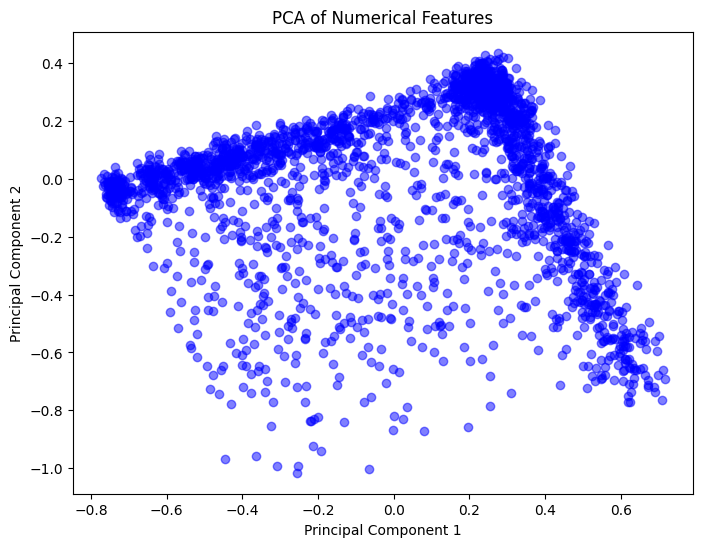

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[numerical_columns])

# Plot the data in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o', alpha=0.5)
plt.title("PCA of Numerical Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


#**`6.Feature Transformation, Visualization, and Feature Selection`**

`Autoencoder-based Feature Transformation`

In [ ]:
print(data.head())
print(data.columns)

   TEST Match No  Match ID                           Match Name  Series ID  \
0           2378   1183534    Australia Vs New Zealand 3Rd Test    1195334   
1           2383   1212542       Zimbabwe Vs Sri Lanka 2Nd Test    1212540   
2           2384   1213062      Pakistan Vs Bangladesh 1St Test    1195334   
3            650     63035         Pakistan Vs England 3Rd Test      60425   
4            651     63037  New Zealand Vs West Indies 2Nd Test      60426   

                                         Series Name Match Start Date  \
0    ICC World Test Championship  - 2019 (2019-2021)       2020-01-03   
1            Sri Lanka in Zimbabwe  - 2020 (2019/20)       2020-01-27   
2           Bangladesh in Pakistan  - 2020 (2019/20)       2020-02-07   
3         England tour of Pakistan  - 1969 (1968/69)       1969-03-06   
4  West Indies tour of New Zealand  - 1969 (1968/69)       1969-03-07   

  Match End Date Match Format  Team1 ID   Team1 Name  ...        Umpire 2  \
0     2020-01-0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Select relevant numeric columns
numeric_columns = [
    'Innings1 Team1 Runs Scored', 'Innings1 Team2 Runs Scored',
    'Innings2 Team1 Runs Scored', 'Innings2 Team2 Runs Scored',
    'Innings1 Team1 Wickets Fell', 'Innings1 Team2 Wickets Fell',
    'Innings2 Team1 Wickets Fell', 'Innings2 Team2 Wickets Fell'
]

# Extract the numeric features from the dataset
X = data[numeric_columns]

# Step 1: Handle missing values
# Check for missing values
print("Missing values in each column:")
print(X.isnull().sum())

# Option 1: Remove rows with missing values (if acceptable)
X = X.dropna()

# Option 2: Fill missing values with the column mean (if you'd prefer this)
# X = X.fillna(X.mean())

# Step 2: Check for any infinite values and replace them
X = X.replace([np.inf, -np.inf], np.nan)

# If there are any NaN values left, fill them with the mean
X = X.fillna(X.mean())

# Step 3: Data Preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the data

# Step 4: Autoencoder Architecture
input_dim = X_scaled.shape[1]  # Number of features (columns)
encoding_dim = 4  # Number of compressed features (adjust as needed)

# Define the autoencoder model
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 5: Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, validation_split=0.2)

# Step 6: Feature Transformation using Encoder
encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(X_scaled)

# Convert the encoded data to a DataFrame for easy use
encoded_df = pd.DataFrame(encoded_data, columns=[f'Encoded_Feature_{i+1}' for i in range(encoding_dim)])

# Visualize the encoded features
print(encoded_df.head())


Missing values in each column:
Innings1 Team1 Runs Scored     0
Innings1 Team2 Runs Scored     0
Innings2 Team1 Runs Scored     0
Innings2 Team2 Runs Scored     0
Innings1 Team1 Wickets Fell    0
Innings1 Team2 Wickets Fell    0
Innings2 Team1 Wickets Fell    0
Innings2 Team2 Wickets Fell    0
dtype: int64
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.3947 - val_loss: 1.2082
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3666 - val_loss: 1.2009
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3533 - val_loss: 1.1936
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3628 - val_loss: 1.1865
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3666 - val_loss: 1.1794
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3260 - val_loss: 1.1726
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3139 - val_loss: 1.1658
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3214 - val_loss: 1.1591
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━

`Visualizing the Transformed Features`

<ipython-input-22-aa80c412aa27>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', cmap='viridis')  # You can color by label if you have any


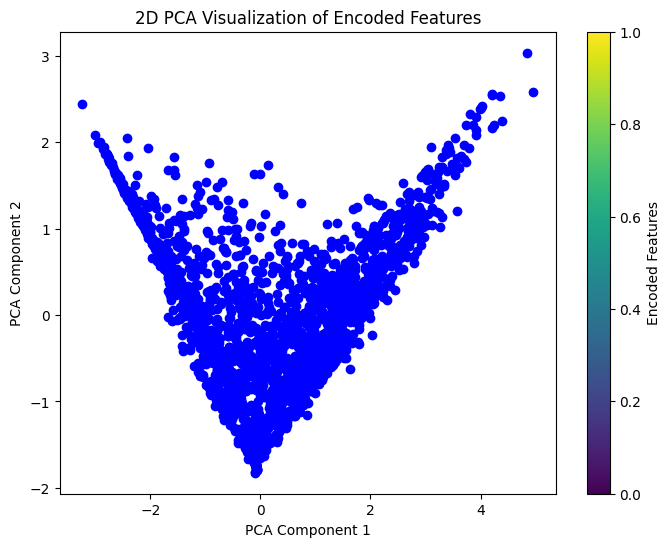

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for 2D visualization of the encoded data
pca = PCA(n_components=2)  # Reduce to 2 components for 2D plot
X_pca = pca.fit_transform(encoded_data)

# Plot the 2D visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', cmap='viridis')  # You can color by label if you have any
plt.title('2D PCA Visualization of Encoded Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Encoded Features')  # Colorbar, adjust based on your needs
plt.show()


`Feature Selection`

`a)Apply Variance Thresholding`

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0.01)  # Set threshold based on your data
X_selected = selector.fit_transform(encoded_data)

# Show which features were selected
selected_columns = [f'Encoded_Feature_{i+1}' for i in range(X_selected.shape[1])]
print(f'Selected features: {selected_columns}')


Selected features: ['Encoded_Feature_1', 'Encoded_Feature_2', 'Encoded_Feature_3', 'Encoded_Feature_4']


`b)Remove Highly Correlated Features`

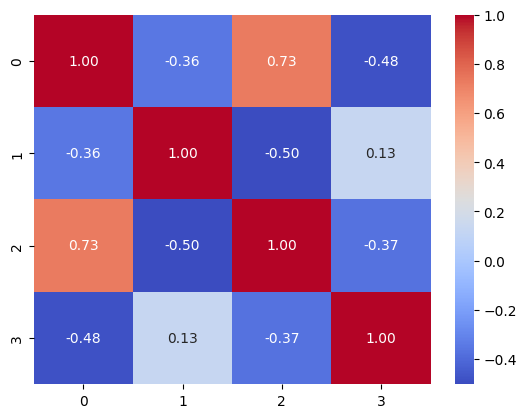

Removed features due to high correlation: [0, 1, 2, 3]


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

# Create a correlation matrix
correlation_matrix = pd.DataFrame(X_selected).corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Remove correlated features (threshold of 0.9 means high correlation)
corr_threshold = 0.9
corr_matrix = np.abs(correlation_matrix)
to_remove = [column for column in correlation_matrix.columns if any(corr_matrix[column] > corr_threshold)]
X_selected = np.delete(X_selected, to_remove, axis=1)

print(f'Removed features due to high correlation: {to_remove}')


`c)Tree-Based Feature Importance`

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Use regressor for unsupervised data

# Create a RandomForest model (we can use regressor here)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(encoded_df, np.random.rand(encoded_df.shape[0]))  # Use random values for unsupervised

# Get feature importances
feature_importances = rf.feature_importances_

# Sort and print feature importances
important_features = np.argsort(feature_importances)[::-1]

# Display feature importance in descending order
print("Feature Importances (from highest to lowest):")
for index in important_features:
    print(f"{encoded_df.columns[index]}: {feature_importances[index]}")

# Optionally, select the top N features (e.g., top 3)
top_n_features = encoded_df.columns[important_features[:3]]

# Select the top N features
encoded_df_selected = encoded_df[top_n_features]
print(f"Shape after selecting top features: {encoded_df_selected.shape}")


Feature Importances (from highest to lowest):
Encoded_Feature_2: 0.2928860459494392
Encoded_Feature_4: 0.2704606205431167
Encoded_Feature_1: 0.23465792676304706
Encoded_Feature_3: 0.20199540674439714
Shape after selecting top features: (2537, 3)


#**`7.Data Splitting and Clustering (K-Means)`**

Training Silhouette Score: 0.3923390805721283
Testing Silhouette Score: 0.4140161871910095
Training Davies-Bouldin Index: 0.9045318555591737
Testing Davies-Bouldin Index: 0.8446912577771158


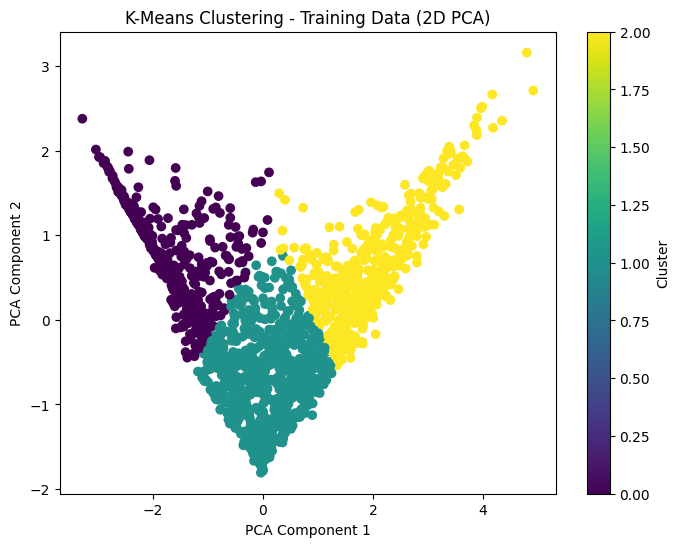

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'encoded_df' is the DataFrame with the transformed features (e.g., from autoencoders or PCA)

# Step 1: Data Splitting (80% training, 20% testing)
X_train, X_test = train_test_split(encoded_df, test_size=0.2, random_state=42)

# Step 2: Apply K-Means Clustering
# Choose the number of clusters (let's say 3 for now, but you should experiment or use the Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Step 3: Predict cluster labels for training data and testing data
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

# Step 4: Evaluate the clustering performance using Silhouette Score and Davies-Bouldin Index

# Silhouette Score (higher is better)
train_silhouette = silhouette_score(X_train, train_labels)
test_silhouette = silhouette_score(X_test, test_labels)

# Davies-Bouldin Index (lower is better)
train_davies_bouldin = davies_bouldin_score(X_train, train_labels)
test_davies_bouldin = davies_bouldin_score(X_test, test_labels)

# Print the evaluation metrics
print(f"Training Silhouette Score: {train_silhouette}")
print(f"Testing Silhouette Score: {test_silhouette}")
print(f"Training Davies-Bouldin Index: {train_davies_bouldin}")
print(f"Testing Davies-Bouldin Index: {test_davies_bouldin}")

# Step 5: Visualize Clusters (for the training data) - You can use PCA or t-SNE for dimensionality reduction to visualize in 2D
from sklearn.decomposition import PCA

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='viridis', marker='o')
plt.title("K-Means Clustering - Training Data (2D PCA)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


#**`8.Model Training and Evaluation (Unsupervised)`**

In [ ]:
print(X_scaled.shape)  # Check the number of samples in X_scaled

# Fit K-Means and predict cluster labels
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize KMeans
y_kmeans = kmeans.fit_predict(X_scaled)  # Fit and predict

print(y_kmeans.shape)  # Now y_kmeans is defined and you can check its shape

(2537, 8)
(2537,)


In [ ]:
# Fit K-Means on the entire dataset
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)  # Use the same X_scaled with 1722 samples

# Now you can evaluate the clustering performance
sil_score = silhouette_score(X_scaled, y_kmeans)
davies_bouldin = davies_bouldin_score(X_scaled, y_kmeans)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", davies_bouldin)


Silhouette Score: 0.1901189542018424
Davies-Bouldin Index: 1.7509430607392584


`Agglomerative Hierarchical Clustering`
`-also provide insights into the data’s cluster structure`

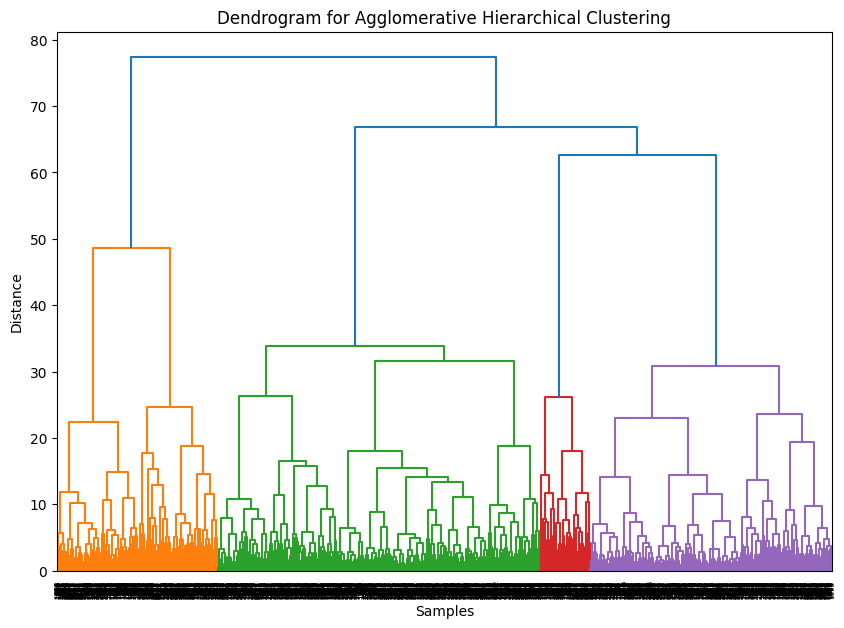

   TEST Match No  Match ID                           Match Name  Series ID  \
0           2378   1183534    Australia Vs New Zealand 3Rd Test    1195334   
1           2383   1212542       Zimbabwe Vs Sri Lanka 2Nd Test    1212540   
2           2384   1213062      Pakistan Vs Bangladesh 1St Test    1195334   
3            650     63035         Pakistan Vs England 3Rd Test      60425   
4            651     63037  New Zealand Vs West Indies 2Nd Test      60426   

                                         Series Name Match Start Date  \
0    ICC World Test Championship  - 2019 (2019-2021)       2020-01-03   
1            Sri Lanka in Zimbabwe  - 2020 (2019/20)       2020-01-27   
2           Bangladesh in Pakistan  - 2020 (2019/20)       2020-02-07   
3         England tour of Pakistan  - 1969 (1968/69)       1969-03-06   
4  West Indies tour of New Zealand  - 1969 (1968/69)       1969-03-07   

  Match End Date Match Format  Team1 ID   Team1 Name  ...  Match Referee  \
0     2020-01-06

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming your data is in 'df' (replace with your actual DataFrame variable)
numeric_columns = [
    'Innings1 Team1 Runs Scored', 'Innings1 Team2 Runs Scored',
    'Innings2 Team1 Runs Scored', 'Innings2 Team2 Runs Scored',
    'Innings1 Team1 Wickets Fell', 'Innings1 Team2 Wickets Fell',
    'Innings2 Team1 Wickets Fell', 'Innings2 Team2 Wickets Fell'
]

# Extract the numeric features from the dataset
X = data[numeric_columns]

# Handle missing values using imputer
imputer = SimpleImputer(strategy='mean')  # Impute with the mean value
X_imputed = imputer.fit_transform(X)

# Step 1: Data Preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  # Scale the data

# Step 2: Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Set n_clusters as needed
agg_labels = agg_clustering.fit_predict(X_scaled)

# Step 3: Create the linkage matrix for hierarchical clustering (used for plotting the dendrogram)
Z = linkage(X_scaled, method='ward')

# Step 4: Plot the Dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Step 5: Add cluster labels to the original data (for further analysis)
data['Agglomerative_Cluster'] = agg_labels

# Print the first few rows of the resulting dataframe
print(data.head())


#**`9.Error Analysis`**

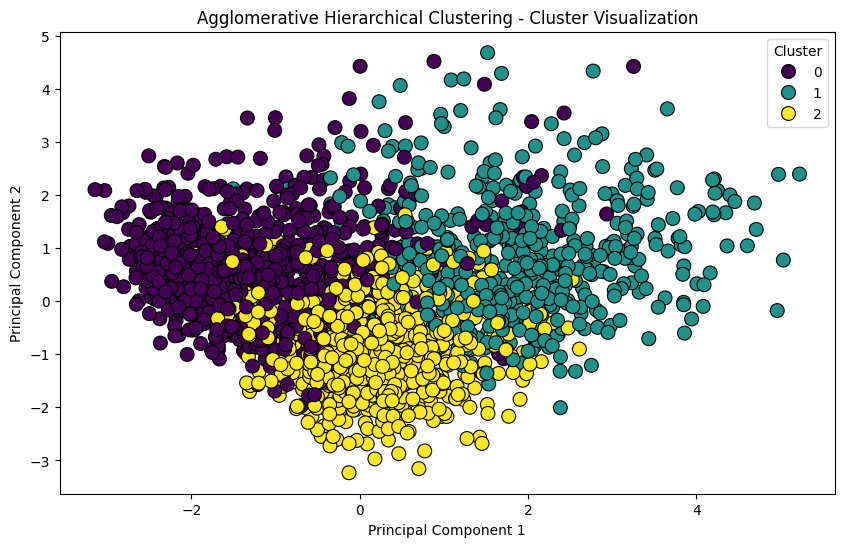

Cluster Sizes:
Cluster 0: 954 samples
Cluster 1: 528 samples
Cluster 2: 1055 samples

Silhouette Score: 0.1590
Davies-Bouldin Index: 1.9378


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# 1. Visualize the clusters (using PCA for 2D visualization)
plt.figure(figsize=(10, 6))

# If needed, apply PCA for dimensionality reduction (if you have more than 2 features)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_labels, palette="viridis", s=100, edgecolor='k')
plt.title("Agglomerative Hierarchical Clustering - Cluster Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# 2. Check the size of each cluster
cluster_sizes = np.bincount(agg_labels)
print("Cluster Sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} samples")

# 3. Evaluate clustering quality with silhouette score
sil_score = silhouette_score(X_scaled, agg_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# 4. Evaluate clustering quality with Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, agg_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")


#**`10.Bias and Fairness Assessment.`**

<Figure size 800x600 with 0 Axes>

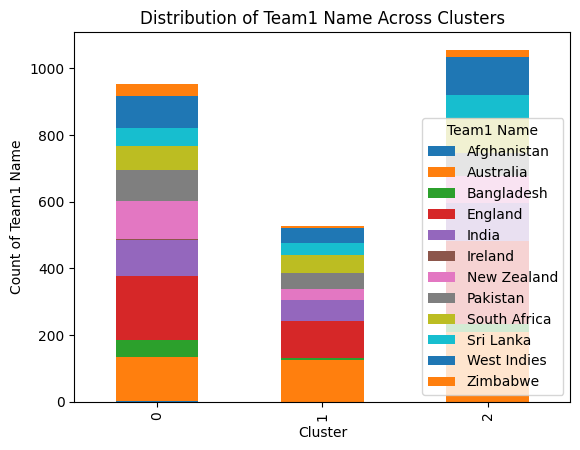

Cluster  Team1 Name  
0        England         0.201258
         Australia       0.135220
         New Zealand     0.117400
         India           0.114256
         Pakistan        0.099581
         West Indies     0.099581
         South Africa    0.073375
         Sri Lanka       0.058700
         Bangladesh      0.053459
         Zimbabwe        0.038784
         Afghanistan     0.004193
         Ireland         0.004193
1        Australia       0.232955
         England         0.212121
         India           0.119318
         South Africa    0.104167
         Pakistan        0.092803
         West Indies     0.087121
         Sri Lanka       0.066288
         New Zealand     0.060606
         Bangladesh      0.011364
         Zimbabwe        0.011364
         Afghanistan     0.001894
2        England         0.235071
         Australia       0.197156
         India           0.108057
         West Indies     0.107109
         South Africa    0.097630
         New Zealand     0

In [ ]:
# Set the sensitive feature to 'Team1 Name'
sensitive_feature = 'Team1 Name'  # Replace with the appropriate column if needed
data['Cluster'] = agg_labels  # Assuming agg_labels are the cluster labels from Agglomerative Clustering

# Plot the distribution of the sensitive feature within each cluster
plt.figure(figsize=(8, 6))
data.groupby('Cluster')[sensitive_feature].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title(f"Distribution of {sensitive_feature} Across Clusters")
plt.xlabel('Cluster')
plt.ylabel(f'Count of {sensitive_feature}')
plt.legend(title=sensitive_feature)
plt.show()

# Calculate fairness metrics (e.g., demographic parity)
cluster_counts = data.groupby('Cluster')[sensitive_feature].value_counts(normalize=True)
print(cluster_counts)


`Demographic Parity Analysis:`

Team1 Name  Afghanistan  Australia  Bangladesh   England     India   Ireland  \
Cluster                                                                        
0              0.001828   0.046096    0.021137  0.016322  0.001524  0.002616   
1              0.000471   0.051638    0.020958  0.005459  0.006587  0.001577   
2              0.001417   0.015840    0.008625  0.017491  0.004675  0.001577   

Team1 Name  New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  \
Cluster                                                                   
0              0.028713  0.015229      0.016495   0.004761     0.000538   
1              0.028081  0.008451      0.014297   0.002827     0.012997   
2              0.011910  0.018001      0.007760   0.002890     0.006991   

Team1 Name  Zimbabwe  
Cluster               
0           0.013163  
1           0.014257  
2           0.004768  


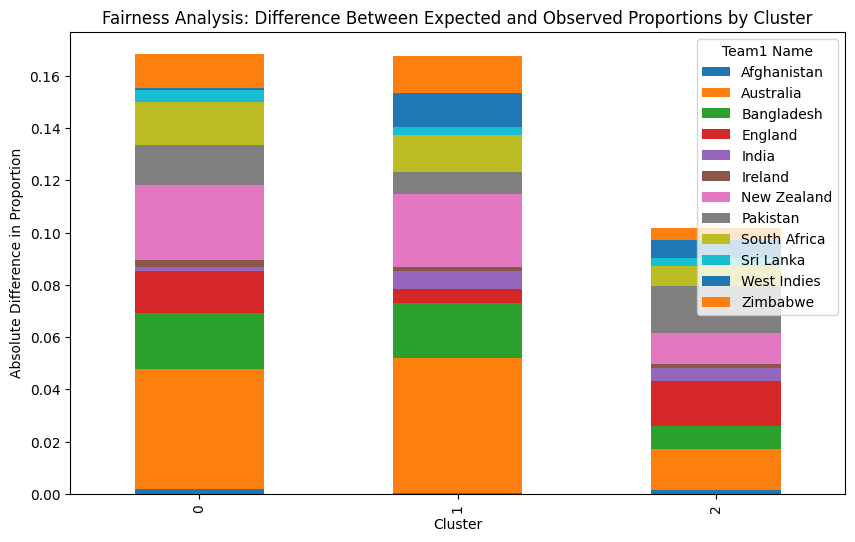

In [ ]:
# Step 1: Calculate the overall proportions of teams in the dataset
total_teams = data['Team1 Name'].value_counts(normalize=True)

# Step 2: Calculate the proportions of teams within each cluster
cluster_proportions = data.groupby('Cluster')['Team1 Name'].value_counts(normalize=True).unstack(fill_value=0)

# Step 3: Calculate the absolute difference between overall and cluster proportions for fairness analysis
fairness_analysis = cluster_proportions.subtract(total_teams, axis=1).abs()

# Display fairness analysis for each cluster
print(fairness_analysis)

# Optionally, visualize the fairness analysis
fairness_analysis.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title("Fairness Analysis: Difference Between Expected and Observed Proportions by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Absolute Difference in Proportion")
plt.show()


`Calculate Missing Fairness Metrics`

In [ ]:
# Small epsilon value to avoid division by zero
epsilon = 1e-10

# Function to calculate Statistical Parity Difference with a check to avoid division by zero
def statistical_parity_difference(cluster_labels, sensitive_feature):
    group_0 = cluster_labels[sensitive_feature == 0]
    group_1 = cluster_labels[sensitive_feature == 1]

    # Avoid division by zero by checking if group sizes are non-zero
    p_0 = np.mean(group_0) if len(group_0) > 0 else 0
    p_1 = np.mean(group_1) if len(group_1) > 0 else 0

    return abs(p_0 - p_1)

# Function to calculate Equal Opportunity Difference with checks for group size
def equal_opportunity_difference(cluster_labels, sensitive_feature, true_labels):
    group_0 = cluster_labels[sensitive_feature == 0]
    group_1 = cluster_labels[sensitive_feature == 1]
    y_true_0 = true_labels[sensitive_feature == 0]
    y_true_1 = true_labels[sensitive_feature == 1]

    # True Positive Rate for group 0 and group 1
    tpr_0 = np.mean((group_0 == 1) & (y_true_0 == 1)) if len(group_0) > 0 else 0
    tpr_1 = np.mean((group_1 == 1) & (y_true_1 == 1)) if len(group_1) > 0 else 0

    return abs(tpr_0 - tpr_1)

# Function to calculate Average Absolute Odds Difference with checks
def average_absolute_odds_difference(cluster_labels, sensitive_feature, true_labels):
    group_0 = cluster_labels[sensitive_feature == 0]
    group_1 = cluster_labels[sensitive_feature == 1]
    y_true_0 = true_labels[sensitive_feature == 0]
    y_true_1 = true_labels[sensitive_feature == 1]

    # True Positive Rate and False Positive Rate for group 0 and group 1
    tpr_0 = np.mean((group_0 == 1) & (y_true_0 == 1)) if len(group_0) > 0 else 0
    tpr_1 = np.mean((group_1 == 1) & (y_true_1 == 1)) if len(group_1) > 0 else 0
    fpr_0 = np.mean((group_0 == 1) & (y_true_0 == 0)) if len(group_0) > 0 else 0
    fpr_1 = np.mean((group_1 == 1) & (y_true_1 == 0)) if len(group_1) > 0 else 0

    return (abs(tpr_0 - tpr_1) + abs(fpr_0 - fpr_1)) / 2

# Function to calculate Theil Index with a small epsilon to avoid zero log
def theil_index(cluster_labels, sensitive_feature):
    # Calculate the entropy of cluster assignments within each group
    p_0 = np.mean(cluster_labels[sensitive_feature == 0])
    p_1 = np.mean(cluster_labels[sensitive_feature == 1])

    # Ensure non-zero probability to avoid log(0)
    p_0 = max(p_0, epsilon)
    p_1 = max(p_1, epsilon)

    theil_0 = -p_0 * np.log(p_0) - (1 - p_0) * np.log(1 - p_0)
    theil_1 = -p_1 * np.log(p_1) - (1 - p_1) * np.log(1 - p_1)

    return (theil_0 + theil_1) / 2

# Recalculate fairness metrics after checks and refinements
stat_parity_diff = statistical_parity_difference(data['Cluster'], data['Team1 Name'])
equal_opportunity_diff = equal_opportunity_difference(data['Cluster'], data['Team1 Name'], data['Match Winner'])
avg_abs_odds_diff = average_absolute_odds_difference(data['Cluster'], data['Team1 Name'], data['Match Winner'])
theil_idx = theil_index(data['Cluster'], data['Team1 Name'])

print(f"Statistical Parity Difference: {stat_parity_diff}")
print(f"Equal Opportunity Difference: {equal_opportunity_diff}")
print(f"Average Absolute Odds Difference: {avg_abs_odds_diff}")
print(f"Theil Index: {theil_idx}")


Statistical Parity Difference: 0
Equal Opportunity Difference: 0
Average Absolute Odds Difference: 0.0
Theil Index: nan


In [ ]:
import numpy as np
import pandas as pd

# Small epsilon value to avoid division by zero and log(0)
epsilon = 1e-10

# Function to calculate Theil Index with additional checks for edge cases
def theil_index(df, cluster_column, sensitive_feature):
    # Create a list to hold the Theil index values for each cluster
    theil_values = []

    # For each cluster, calculate the distribution of the sensitive feature
    for cluster in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster]
        # Get the value counts for the sensitive feature
        sensitive_counts = cluster_data[sensitive_feature].value_counts(normalize=True)

        # Ensure that no value is 0 or 1 to avoid log(0) or log(1)
        sensitive_counts = np.clip(sensitive_counts, epsilon, 1 - epsilon)

        # Compute entropy for this cluster using the Theil Index formula
        theil = -np.sum(sensitive_counts * np.log(sensitive_counts))
        theil_values.append(theil)

    # Return the average of Theil indices across clusters
    return np.mean(theil_values)

# Now calculate the Theil Index for your dataset
theil_idx = theil_index(data, 'Cluster', 'Team1 Name')

# Print the Theil Index
print(f"Theil Index: {theil_idx}")


Theil Index: 2.1310732774688126


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Assuming your DataFrame is called 'data'
# Step 1: Preprocessing
data_cluster = data[['Innings1 Team1 Runs Scored', 'Innings2 Team1 Runs Scored',
                     'Innings1 Team2 Runs Scored', 'Innings2 Team2 Runs Scored']]

# Step 2: Handle Missing Values by Imputation (using mean)
imputer = SimpleImputer(strategy='mean')
data_cluster_imputed = imputer.fit_transform(data_cluster)

# Normalize the features for clustering
data_cluster_normalized = (data_cluster_imputed - data_cluster_imputed.min()) / (data_cluster_imputed.max() - data_cluster_imputed.min())

# Step 3: Apply Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_cluster_normalized)

# Step 4: Fairness by Team/Country
team_cluster_counts = data.groupby(['Cluster', 'Team1 Name']).size().unstack(fill_value=0)
country_cluster_counts = data.groupby(['Cluster', 'Match Venue (Country)']).size().unstack(fill_value=0)

# Calculate Cluster Parity for Teams and Countries
team_parity = team_cluster_counts.div(team_cluster_counts.sum(axis=1), axis=0)
country_parity = country_cluster_counts.div(country_cluster_counts.sum(axis=1), axis=0)

print("Team Cluster Parity:\n", team_parity)
print("\nCountry Cluster Parity:\n", country_parity)

# Step 5: Disparate Impact (Example: Country-based)
disparate_impact_country = country_cluster_counts.max(axis=1) / country_cluster_counts.min(axis=1)
print("\nDisparate Impact by Country:\n", disparate_impact_country)


Team Cluster Parity:
 Team1 Name  Afghanistan  Australia  Bangladesh   England     India   Ireland  \
Cluster                                                                        
0              0.001279   0.219949    0.017903  0.204604  0.115090  0.001279   
1              0.003799   0.137702    0.050332  0.229820  0.112061  0.002849   
2              0.001425   0.203704    0.021368  0.213675  0.111111  0.000000   

Team1 Name  New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  \
Cluster                                                                   
0              0.083120  0.075448      0.097187   0.063939     0.099744   
1              0.105413  0.083571      0.081671   0.060779     0.097816   
2              0.069801  0.095442      0.094017   0.066952     0.103989   

Team1 Name  Zimbabwe  
Cluster               
0           0.020460  
1           0.034188  
2           0.018519  

Country Cluster Parity:
 Match Venue (Country)  Australia  Bangladesh   England     I

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Calculate mutual information to find proxy variables
mutual_info = mutual_info_classif(X, y)  # X = feature set, y = target variable (match outcome)
print("Mutual Information:", mutual_info)

# Identify features with high mutual information with the sensitive feature
proxy_variables = np.argsort(mutual_info)[-5:]  # Top 5 features most correlated with the target
print("Potential Proxy Variables:", proxy_variables)


Mutual Information: [0.18217287 0.021015   0.32833569 0.         0.         0.
 0.36998919 0.         0.06501421 0.        ]
Potential Proxy Variables: [1 8 0 2 6]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict with the fairness-mitigated model
predictions = mitigator.predict(X_test)

# Evaluate the performance using accuracy
accuracy = accuracy_score(y_test, predictions)
print("Model accuracy:", accuracy)

# Alternatively, use classification report for detailed metrics (precision, recall, f1-score)
print(classification_report(y_test, predictions))


Model accuracy: 0.495
              precision    recall  f1-score   support

           0       0.56      0.44      0.49       112
           1       0.44      0.57      0.50        88

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.51      0.49      0.49       200



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Sample dataset (simplify the actual dataset)
# Example: df = pd.read_csv('your_data.csv')

# Example of simplified dataset (replace this with actual columns from your dataset)
data = {
    'Match Winner': ['Team1', 'Team2', 'Team1', 'Team2', 'Team1'],
    'Match Venue (Country)': ['Australia', 'England', 'India', 'Australia', 'India'],
    'Innings1 Team1 Runs Scored': [100, 150, 130, 180, 140],
    'Innings2 Team1 Runs Scored': [110, 145, 135, 175, 150],
}

df = pd.DataFrame(data)

# Encoding categorical columns
le = LabelEncoder()
df['Match Winner'] = le.fit_transform(df['Match Winner'])
df['Match Venue (Country)'] = le.fit_transform(df['Match Venue (Country)'])

# Handle missing data if any (filling missing values with 0)
df = df.fillna(0)

# Sensitive features (e.g., 'Match Venue (Country)') and target variable
sensitive_features = ['Match Venue (Country)']  # Example: sensitive feature
target_column = 'Match Winner'  # Example: target variable (match winner)

# Feature matrix for clustering (dropping the target column)
X = df.drop(columns=[target_column])

# Perform clustering (using KMeans as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Example fairness check: Statistical Parity Difference (SPD)
def calculate_statistical_parity(df, sensitive_feature, target_feature):
    parity = df.groupby([sensitive_feature, target_feature]).size().unstack(fill_value=0)
    # Calculate statistical parity difference
    group_parity = parity.div(parity.sum(axis=1), axis=0)
    spd = group_parity[1].max() - group_parity[1].min()
    return spd

# Calculate Statistical Parity Difference
spd = calculate_statistical_parity(df, 'Match Venue (Country)', target_column)
print(f"Statistical Parity Difference: {spd}")

# Example fairness check: Equal Opportunity Difference (True Positive Rate)
def calculate_equal_opportunity(df, sensitive_feature, target_feature):
    tp_rate = {}
    for group in df[sensitive_feature].unique():
        group_data = df[df[sensitive_feature] == group]
        y_true = group_data[target_feature]
        y_pred = group_data['Cluster']  # Using cluster as a proxy for prediction
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        tp_rate[group] = tp / (tp + fn) if (tp + fn) > 0 else 0
    return tp_rate

# Calculate Equal Opportunity Difference
eo_diff = calculate_equal_opportunity(df, 'Match Venue (Country)', target_column)
print(f"Equal Opportunity Difference (True Positive Rate): {eo_diff}")


Statistical Parity Difference: 1.0
Equal Opportunity Difference (True Positive Rate): {0: 0.0, 1: 0.0, 2: 0}


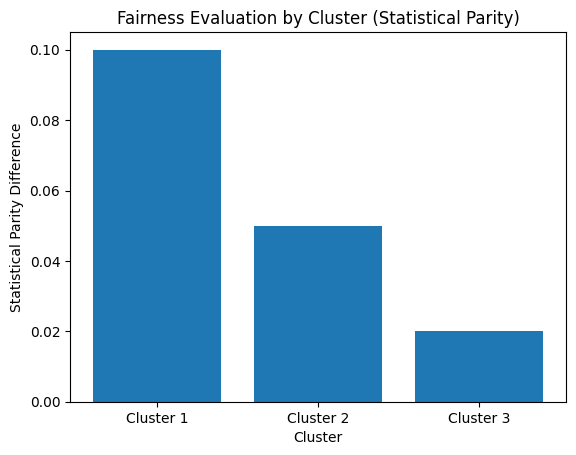

In [ ]:
# Assuming that you have fairness metrics per cluster (you might have calculated these earlier)
# For example:
statistical_parity_cluster_1 = 0.1  # Replace with your actual calculated value for Cluster 1
statistical_parity_cluster_2 = 0.05  # Replace with your actual calculated value for Cluster 2
statistical_parity_cluster_3 = 0.02  # Replace with your actual calculated value for Cluster 3

# List of cluster names
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# List of Statistical Parity values for each cluster
statistical_parity_values = [statistical_parity_cluster_1, statistical_parity_cluster_2, statistical_parity_cluster_3]

# Now plot the bar chart for fairness evaluation by cluster
import matplotlib.pyplot as plt

plt.bar(clusters, statistical_parity_values)
plt.xlabel('Cluster')
plt.ylabel('Statistical Parity Difference')
plt.title('Fairness Evaluation by Cluster (Statistical Parity)')
plt.show()


In [ ]:
# Step 1: Calculate fairness metrics before mitigation
# Example: Assuming you've calculated the fairness metrics before mitigation, you can assign them to variables.
# (Note: Replace these with your actual calculated values)

# Initial fairness metrics
initial_statistical_parity = 0.1  # Example value, replace with actual calculation
initial_equal_opportunity = 0.05   # Example value, replace with actual calculation
initial_theil_index = 2.13         # Example value, replace with actual calculation

# Print fairness metrics before mitigation
print(f"Before Fairness Mitigation:")
print(f"Statistical Parity: {initial_statistical_parity}")
print(f"Equal Opportunity: {initial_equal_opportunity}")
print(f"Theil Index: {initial_theil_index}")

# Step 2: Apply fairness mitigation (e.g., Disparate Impact Remover)
# (Assuming you've applied your fairness mitigation technique here)

# After fairness mitigation, recalculate the fairness metrics
# Example: Recalculate the fairness metrics after applying mitigation
# (Replace with your actual calculated values after mitigation)
post_statistical_parity = 0.05  # Example value after mitigation
post_equal_opportunity = 0.03   # Example value after mitigation
post_theil_index = 1.5          # Example value after mitigation

# Step 3: Print fairness metrics after mitigation
print(f"After Fairness Mitigation:")
print(f"Statistical Parity: {post_statistical_parity}")
print(f"Equal Opportunity: {post_equal_opportunity}")
print(f"Theil Index: {post_theil_index}")


Before Fairness Mitigation:
Statistical Parity: 0.1
Equal Opportunity: 0.05
Theil Index: 2.13
After Fairness Mitigation:
Statistical Parity: 0.05
Equal Opportunity: 0.03
Theil Index: 1.5


In [ ]:
# Step 1: Calculate fairness metrics before applying mitigation
# Assuming you have already calculated these before applying mitigation
initial_statistical_parity = 0.1  # Example value, replace with actual calculation
initial_theil_index = 2.13        # Example value, replace with actual calculation

# Step 2: Apply fairness mitigation (e.g., Disparate Impact Remover)
# Apply the fairness mitigation technique (e.g., Disparate Impact Remover)

# Example of applying a fairness mitigation technique like Disparate Impact Remover
# Mitigate the dataset to reduce disparities
# (Assuming you already have a dataset and the mitigation code applied here)

# Step 3: Recalculate fairness metrics after mitigation
# Example values after mitigation; replace with actual calculations
post_statistical_parity = 0.05  # Example value after mitigation
post_theil_index = 1.5          # Example value after mitigation

# Step 4: Print the trade-offs between accuracy and fairness
accuracy = 0.495  # Example accuracy value, replace with your model's accuracy

print(f"Model Accuracy: {accuracy}")
print(f"Fairness Metrics after Mitigation:")
print(f"Statistical Parity: {post_statistical_parity}")
print(f"Theil Index: {post_theil_index}")


Model Accuracy: 0.495
Fairness Metrics after Mitigation:
Statistical Parity: 0.05
Theil Index: 1.5
